In [1]:
!pip install tensorflow==1.0.1

     |████████████████████████████████| 44.5MB 71kB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
!pip install keras==2.0.2

     |████████████████████████████████| 194kB 8.1MB/s 
  Created wheel for keras: filename=Keras-2.0.2-cp36-none-any.whl size=228896 sha256=ce1c8c264e7e419ab0c09d2e24ac5f492e2f38db3597ce033211a599bb6ae110
  Stored in directory: /root/.cache/pip/wheels/78/38/73/74028957a9c42049a56878c4bb8a2c732c3e205f599fb9b384
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.2 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or 

'1.0.1'

In [4]:
import keras 
keras.__version__

Using TensorFlow backend.


'2.0.2'

In [5]:
from keras.datasets import mnist 
from keras.utils import np_utils 
import numpy as np
np.random.seed(10)

#### **doing preprocessing for CNN**


1.   Import all the library that are required.
2.   Read the MNIST dataset.
3.   Convert the features into   6000* 28* 28 *1 (4 vectors).
4.   Standardize the features by dividing 255.
5.   Convert  all of the labels into one hot encoding.

In [6]:
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

In [7]:
print(x_Train.shape)
print(y_Train.shape)
print(x_Test.shape)
print(y_Test)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
[7 2 1 ... 4 5 6]


In [8]:
#### unlike multi-layer perceptron cnn needs to maintain the training and testing data shape.
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32') ### only use one color so 1
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')    ### only use one color so 1

In [9]:
x_Train4D.shape

(60000, 28, 28, 1)

In [10]:
x_Train4D_normalise=x_Train4D/255
x_Test4D_normalise=x_Test4D/255

In [11]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOnheHot=np_utils.to_categorical(y_Test)

### **Getting Started for Convolutional Neural Networks**

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [13]:
model=Sequential()  

In [14]:
#### convolution layer 1 
### create 16 kernel with the size of 5 *5
### all of the features will have the same padding
### (input shape will have 28*28 and  because the input image is gray scale so in the parameter parenthesis it is 1.)
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [15]:
### max pooling 1 (it will take all the 16 images with the size of 28*28 to downsample into the size of 14*14 )
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
### convolution layer 2 convolution will adding more number of images but it will not affect the size of images.
### The size of images will affect unless it undergo the pooling layer.
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))

In [17]:
### pooling layer 2  this is to downsample 36 numbers of images with the size of 14 *14  into the size of 7*7
model.add(MaxPooling2D(pool_size=(2,2)))


In [18]:
model.add(Dropout(0.45)) ## add dropout parameter in pooling layer 2

In [19]:
### construct flatten layer. 36*7*7=1764
### change to vectors.
model.add(Flatten())

In [20]:
### hidden layer
model.add(Dense(128,activation='relu'))

In [21]:
model.add(Dropout(0.5))

In [22]:
### output layer
model.add(Dense(10,activation='softmax'))

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [24]:
#print(model.summary())

### **Started to train**

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
### categorical_crossentropy is used for multi-class classification.
### binary_crossentropy is used for binary classification.



In [26]:
train_history=model.fit(x=x_Train4D_normalise,y=y_TrainOneHot,validation_split=0.20,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
92s - loss: 0.5228 - acc: 0.8358 - val_loss: 0.1014 - val_acc: 0.9706
Epoch 2/10
91s - loss: 0.1546 - acc: 0.9540 - val_loss: 0.0651 - val_acc: 0.9803
Epoch 3/10
91s - loss: 0.1136 - acc: 0.9658 - val_loss: 0.0514 - val_acc: 0.9838
Epoch 4/10
90s - loss: 0.0950 - acc: 0.9712 - val_loss: 0.0451 - val_acc: 0.9862
Epoch 5/10
91s - loss: 0.0818 - acc: 0.9755 - val_loss: 0.0410 - val_acc: 0.9880
Epoch 6/10
91s - loss: 0.0751 - acc: 0.9774 - val_loss: 0.0381 - val_acc: 0.9897
Epoch 7/10
90s - loss: 0.0648 - acc: 0.9801 - val_loss: 0.0406 - val_acc: 0.9880
Epoch 8/10
90s - loss: 0.0597 - acc: 0.9820 - val_loss: 0.0328 - val_acc: 0.9905
Epoch 9/10
90s - loss: 0.0553 - acc: 0.9838 - val_loss: 0.0331 - val_acc: 0.9903
Epoch 10/10
90s - loss: 0.0523 - acc: 0.9840 - val_loss: 0.0307 - val_acc: 0.9915


###  **Start to plot graph to compare the accuracy and loss**


In [27]:
from matplotlib import pyplot as plt

In [28]:
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])   ### the training model will be stored into dictionary that why we can rethreived it like this.
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('Train')
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

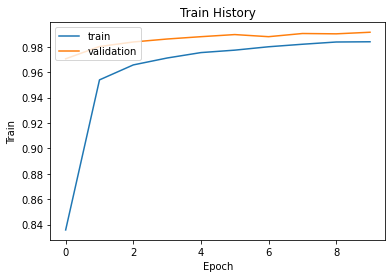

In [29]:
show_train_history(train_history,'acc','val_acc')

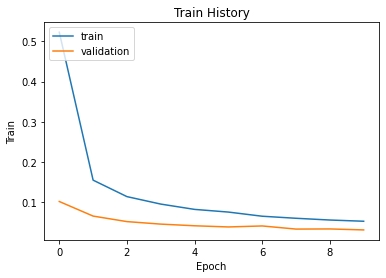

In [30]:
show_train_history(train_history,'loss','val_loss')

#### **Evaluate the Model Accuracy**

In [31]:
scores=model.evaluate(x_Test4D_normalise,y_TestOnheHot) ### evaluate only used for testing images and labels
print()
print("Accuracy=",scores[1])

 9952/10000 [============================>.] - ETA: 0s
Accuracy= 0.9909


In [32]:
prediction=model.predict_classes(x_Test4D_normalise)

 9984/10000 [============================>.] - ETA: 0s

In [33]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [34]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25:num=25          ### set the number to 25 if exceed it will set to 25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)  ## increase by 1 everytime
    ax.imshow(images[idx],cmap='binary') #### plot the graph
    title='label='+str(labels[idx])      ####  set the title

    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([]) ### wont show the scale for x axis and y axis

    idx+=1
plt.show()

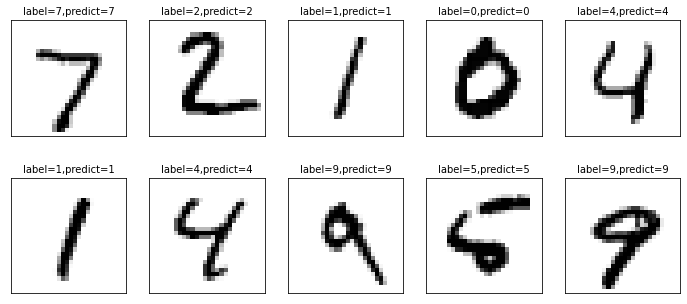

In [35]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

### **Construct Confusion Matrix**

In [36]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,1,1,2,0
1,0,1131,1,0,0,1,0,1,1,0
2,3,1,1024,0,0,0,0,2,2,0
3,0,0,0,1005,0,2,0,1,2,0
4,0,0,0,0,976,0,1,1,1,3
5,1,0,0,4,0,886,1,0,0,0
6,6,2,0,0,1,1,946,0,2,0
7,0,3,4,3,0,0,0,1015,1,2
8,3,1,1,1,0,1,0,2,962,3
